# Práctica 4 de IA

## 1. Construcción de clasificadores en bases de datos sintéticas (1.5 puntos)

In [10]:
# Esta primera parte está adaptada de:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [12]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X*np.matrix([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

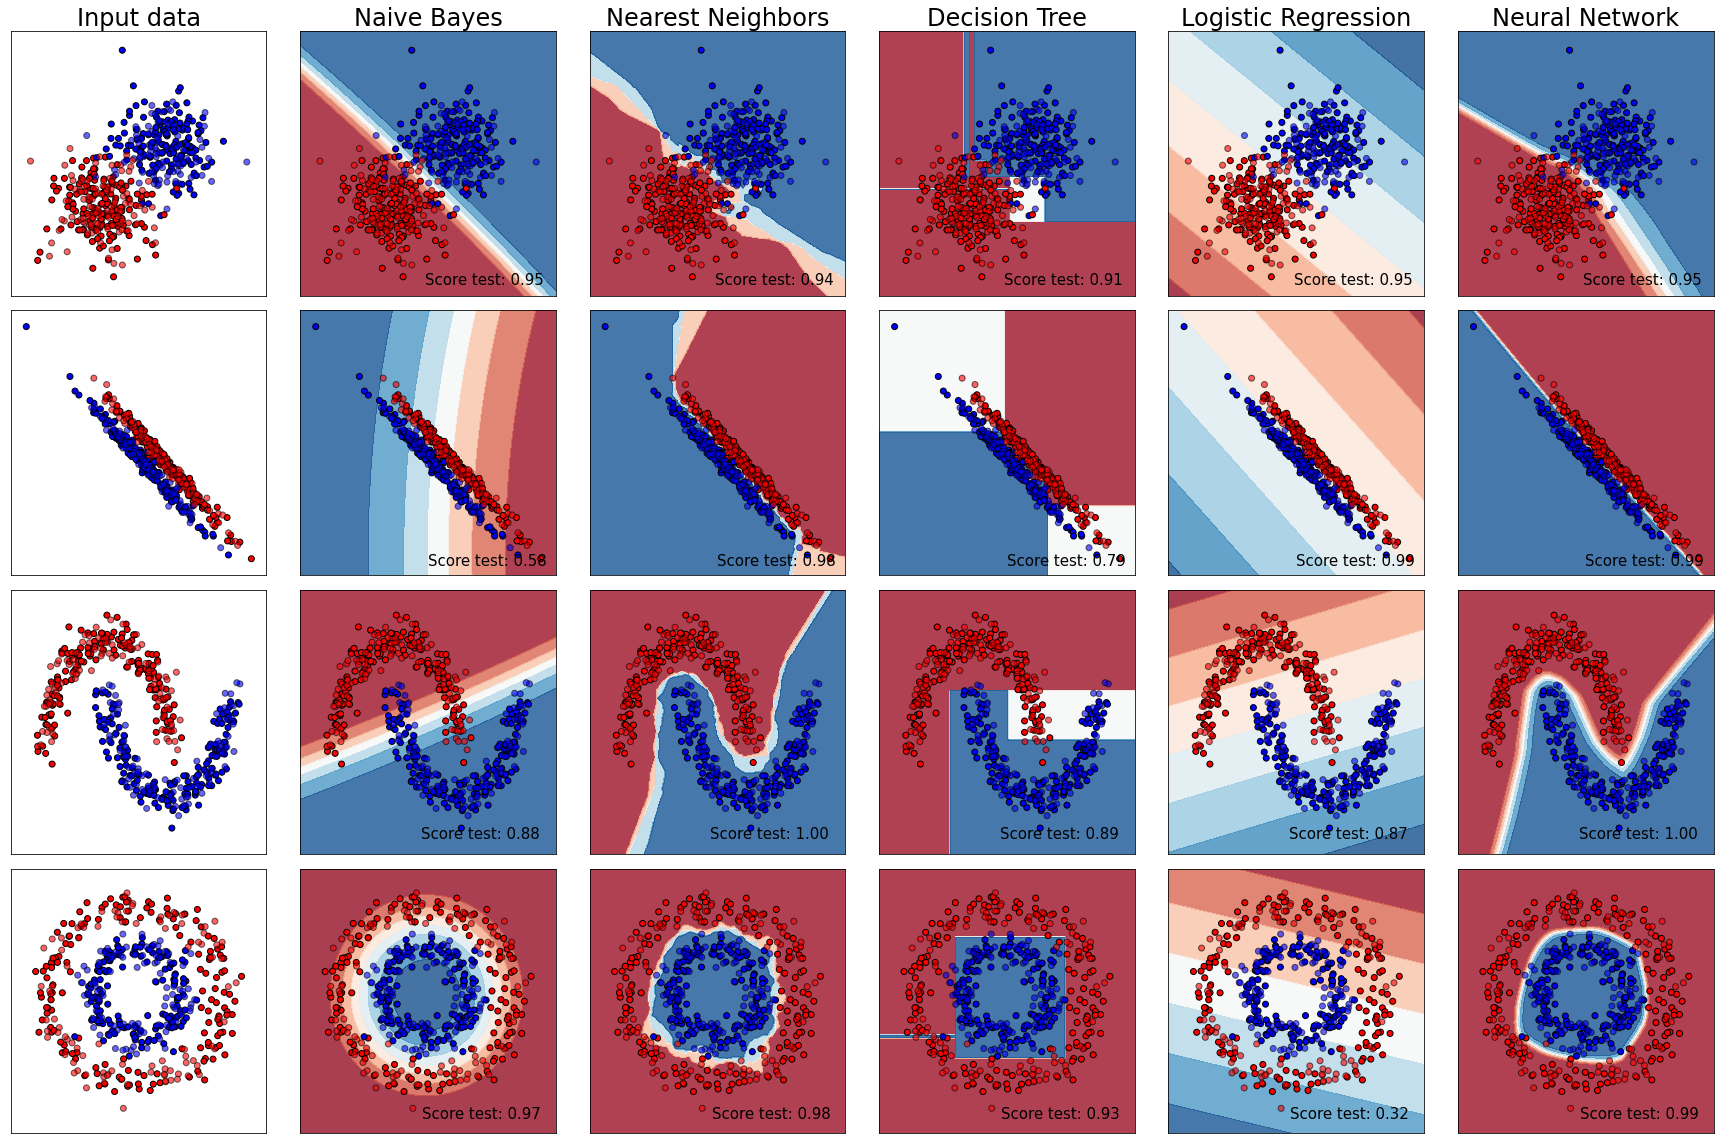

In [13]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=3)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=4)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1e10,solver='lbfgs')), # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(100,200),
                              max_iter=1000,
                              alpha=0))]

from p4_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)

In [14]:
### Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

GaussianNB()
KNeighborsClassifier(n_neighbors=3)
DecisionTreeClassifier(criterion='entropy', max_depth=4)
LogisticRegression(C=10000000000.0)
MLPClassifier(alpha=0, hidden_layer_sizes=(100, 200), max_iter=1000)


**Prueba a cambiar los siguientes parámetros y observa las consecuencias en la frontera de clasificación construida:**

* Número de vecinos en k-nn. ¿Por qué siempre debe ser impar cuando hay dos clases?
* Profundidad máxima de los árboles de decisión.
* Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. **Nota:** (50,) indica una única capa oculta con 50 neuronas. (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente. (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.

1. Por lo general, el número de vecinos en KNN deberá ser impar, haya dos clases o más. Esto de debe a que KNN es un algoritmo de voto mayoritario. Un número par en el número de vecinos puede llevar a un empate a la hora de decidir la clase mayoritaria. Por lo tanto, con este clasificador se obtienen mejores resultados si introducimos como n_neighbours un valor impar. Este sería un ejemplo para el número de clases igual a 2 como se propone en la cuestión: imaginemos que tenemos dos clases (0 y 1); queremos clasificar un dato mediante KNN y obtener la clase mayoritaria poniendo como n_neighbours = 2; el clasificador cogerá los 2 vecinos más próximos a ese dato y obtendrá su clase; si la clase en esos dos vecinos es la misma (por ejemplo 0 y 0) si que tendremos un resultado, pero si es distinta (0 y 1), no se podrá obtener un resultado y por ello es impreciso.

   Al ejecutar el clasificador con n_neighbours = 1 se puede observar que la frontera de decisión es muy precisa. La mayoría de los puntos rojos se sitúan en su correspondiente frontera y con los azules ocurre lo mismo. Además no existen secciones blancas en las representaciones gráficas. 
   Posteriormente, hemos probado con n_neighbours = 2. En cuanto a resultados de clasificación, algunos de los datos obtienen puntuaciones iguales y otros obtienen puntuaciones ligeramente más bajas. Lo que realmente difiere y se puede apreciar más fácilmente son las regiones blancas que se forman cuando elegimos un número par para los vecinos. Esto quiere decir que hay secciones del conjunto de datos en las que ha surgido incertidumbre a la hora de clasificar. Principalmente se debe a lo explicado previamente a la hora de escoger un número par para n_neighbours. Para obtener los scores don distintos parámetros hemos ido cambiado la variable n_neighbors del KNeighborsClassifier de la celda 19 de este notebook.
   
   **SCORES CON n_neighbours = 1**
    * data1 = 0.93
    * data2 = 0.99
    * data3 = 1.00
    * data4 = 0.97
    
   **SCORES CON n_neighbours = 2**
    * data1 = 0.92
    * data2 = 0.98
    * data3 = 1.00
    * data4 = 0.96
    
   **SCORES CON n_neighbours = 3**
    * data1 = 0.94
    * data2 = 0.98
    * data3 = 1.00
    * data4 = 0.98
  
    

2. A medida que se va incrementando la profundidad máxima, la frontera de decisión se acaba volviendo más precisa. Además, como era de esperar, los resultados del score son mucho mejores. Para obtener los scores don distintos parámetros hemos ido cambiado la variable max_depth del DecisionTreeClassifier de la celda 19 de este notebook.

    **SCORES CON max_depth = 2**
    * data1 = 0.92
    * data2 = 0.59
    * data3 = 0.88
    * data4 = 0.73
    
   **SCORES CON max_depth = 4**
    * data1 = 0.92
    * data2 = 0.79
    * data3 = 0.89
    * data4 = 0.93
    
   **SCORES CON max_depth = 50**
    * data1 = 0.91
    * data2 = 0.93
    * data3 = 0.95
    * data4 = 0.93
      
   Como se puede observar, hemos obtenido resultados mucho mejores con mayor profundidad. Al aumentar el valor de este parámetro estamos haciendo que el árbol crezca más y obtendrá más información del conjunto de datos. Sin embargo, tenemos que tener cuidado, ya que si este valor aumenta demasiado podríamos causar un sobre-ajuste de los datos. Esto provocaría que no generalice de forma correcta el conjunto de entrenamiento y que la clasificación no sea del todo real. Probando con valores mayores (50 por ejemplo) observamos que los scores siguien siendo buenos, pero existen imprecisiones a la hora de determinar las fronteras.



3. Al ir realizando varias ejecuciones, hemos comprobado que el parámetro "max_iter", no hace que varíe mucho los resultados. Lo podemos observar con los siguientes valores:

    **SCORES CON max_iter = 1000 y 2 capas ocultas con 100 y 50**
    * data1 = 0.95
    * data2 = 0.99
    * data3 = 1.00
    * data4 = 0.98
    
   **SCORES CON max_iter = 2000 y 2 capas ocultas con 100 y 50**
    * data1 = 0.95
    * data2 = 0.99
    * data3 = 1.00
    * data4 = 0.98
    
   Podemos ver que los scores no han cambiado absolutamente NADA y no se pueden observar diferencias notables en las fronteras de clasificación. Este parámetro no nos es demasiado útil como para variarlo y obtener mejores resultados, por lo menos con los datasets que se nos proporcionan. Lo dejaremos fijo en 1000 y nos centraremos en variar el número de neuronas y capas.
   
   **SCORES CON max_iter = 1000 y 2 capas ocultas con 300 y 200**
    * data1 = 0.94
    * data2 = 0.99
    * data3 = 1.00
    * data4 = 0.98
    
   **SCORES CON max_iter = 1000 y 3 capas ocultas con 300, 200 y 100**
    * data1 = 0.94
    * data2 = 0.99
    * data3 = 1.00
    * data4 = 0.99
    
   En cuanto a scores respecta, no se pueden observar diferencias entre las dos ejecuciones con los cambios de parámetros. Sin embargo, cuando hemos analizado las gráficas, hemos visto que la red neuronal que usa 3 capas con los valores (300, 200, 100) obtiene una franja blanca más reducida que la que usa dos capas. En conclusión, la que tiene más capas clasifica mejor, pero no es buena práctica añadir demasiadas capas a las redes neuronales. Por lo tanto, podríamos decir que los parámetros ideales podrían ser: max_iter = 1000, (300, 200), así añadimos una cantidad suficiente de neuronas y 2 capas serían suficientes. Para obtener los scores don distintos parámetros hemos ido cambiado la variables max_iter y hidden_layer_sized del MLPClassifier de la celda 19 de este notebook.